# Skew, Kurtosis

# Distributions, Skewness, Kurtosis

## 1. Distribution
### Définition
En statistiques, une **distribution** décrit la manière dont les valeurs d’une variable sont réparties.  
Elle peut être :
- **Discrète** : valeurs séparées (ex. nombre de clients par jour)
- **Continue** : valeurs sur un intervalle (ex. prix, rendement)

Caractéristiques principales :
- **Moyenne** (tendance centrale)
- **Variance** (dispersion)
- **Skewness** (asymétrie)
- **Kurtosis** (aplatissement)

La distribution est décrite par sa fonction de probabilité (loi discrète) ou de densité (loi continue), notée $f(x)$.

---

## 2. Variance et moments
On définit les **moments centrés** :

$$
\mu_k = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^k
$$

- $\mu_1 = 0$ (par définition de la moyenne)
- $\mu_2$ = variance $\sigma^2$
- $\mu_3$ = moment centré d’ordre 3
- $\mu_4$ = moment centré d’ordre 4

**Variance** :

$$
\sigma^2 = \mu_2 = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2
$$

---

## 3. Skewness (Asymétrie)
### Définition
Mesure le degré d’asymétrie de la distribution par rapport à la moyenne.

- **Skewness = 0** : distribution symétrique (ex. loi normale)
- **Skewness > 0** : queue plus longue à droite (asymétrie positive)
- **Skewness < 0** : queue plus longue à gauche (asymétrie négative)

### Formule (en fonction de la variance)
$$
\text{Skewness} = \frac{\mu_3}{(\sigma^2)^{3/2}}
\\
\text{Skewness} = \frac{\mu_3}{(\sigma^3)}
$$

où :
- $\mu_3$ = moment centré d’ordre 3
- $\sigma^2 = \mu_2$ = variance

---

## 4. Kurtosis (Aplatissement)
### Définition
Mesure l’épaisseur des queues et la concentration des valeurs autour de la moyenne.

- **Kurtosis > 3** : queues épaisses, plus d’outliers (**leptokurtique**)
- **Kurtosis \approx 3** : même aplatissement qu’une normale (**mésokurtique**)
- **Kurtosis < 3** : queues fines, moins d’outliers (**platykurtique**)

On utilise souvent le **kurtosis excessif** :

$$
\text{Excess Kurtosis} = \text{Kurtosis} - 3
$$

### Formule (en fonction de la variance)
$$
\text{Kurtosis} = \frac{\mu_4}{(\sigma^2)^{2}}
\\
\text{Kurtosis} = \frac{\mu_4}{(\sigma^4)}
$$


où :
- $\mu_4$ = moment centré d’ordre 4
- $\sigma^2 = \mu_2$ = variance

---

## 5. Utilisation
### En finance
- **Skewness** : détecter si les rendements ont un biais vers les pertes ou gains extrêmes.
- **Kurtosis** : mesurer la probabilité d’événements extrêmes (queues épaisses).
- En gestion du risque, une kurtosis élevée $\Rightarrow$ Value-at-Risk sous-estimée si on suppose une loi normale.

### En data science
- Identifier des distributions non normales.
- Décider si une transformation (log, Box-Cox) est nécessaire.
- Détection d’anomalies.

---


Normal: (np.float64(0.01933205582232549), np.float64(0.9787262077473543), np.float64(0.11697636882001397), np.float64(3.066205892921484), np.float64(0.06620589292148393))
Skewed: (np.float64(1.0079859336968675), np.float64(1.0024868892945484), np.float64(1.9837888698617543), np.float64(8.379440485395413), np.float64(5.379440485395413))


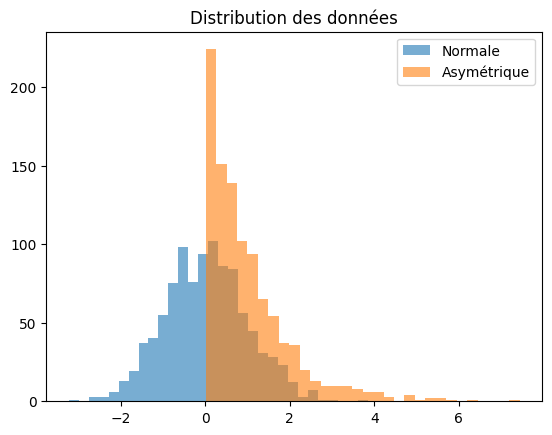

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


#NB/ distribution;fit utilise MLE

# Génération de données simulées
np.random.seed(42)
data_normal = np.random.normal(0, 1, 1000)  # Normale
data_skewed = np.random.exponential(1, 1000)  # Asymétrique positive

# Calcul des stats
def compute_stats(data):
    mean = np.mean(data)
    std = np.std(data, ddof=0)
    skew = stats.skew(data, bias=False) # Calcul avec la formule ferm
    kurt = stats.kurtosis(data, fisher=False)  # fisher=False => kurtosis "classique"
    excess_kurt = stats.kurtosis(data, fisher=True)  # kurtosis excessif
    return mean, std, skew, kurt, excess_kurt

print("Normal:", compute_stats(data_normal))
print("Skewed:", compute_stats(data_skewed))

# Visualisation
plt.hist(data_normal, bins=30, alpha=0.6, label="Normale")
plt.hist(data_skewed, bins=30, alpha=0.6, label="Asymétrique")
plt.legend()
plt.title("Distribution des données")
plt.show()
